In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Bird baths in Australia

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-08-31/bird_baths.csv'
birds = pd.read_csv(url)
birds.tail()

,survey_year,urban_rural,bioregions,bird_type,bird_count
161052,NaN,NaN,NaN,White-winged Chough,8
161053,NaN,NaN,NaN,Eastern Whipbird,21
161054,NaN,NaN,NaN,Golden Whistler,19
161055,NaN,NaN,NaN,Satin Flycatcher,1
161056,NaN,NaN,NaN,Grey Fantail,123


Our **goal** is to predict the probability of whether we’ll see a bird at a bird bath in Australia, given info like what kind of bird we’re looking for and whether the bird bath is in an urban or rural location.

We'll focus on birds from the following list.

In [3]:
birds_list = [
    'Noisy Miner',
    'Australian Magpie',
    'Rainbow Lorikeet',
    'Red Wattlebird',
    'Superb Fairy-wren',
    'Magpie-lark',
    'Pied Currawong',
    'Crimson Rosella',
    'Eastern Spinebill',
    'Spotted Dove',
    "Lewin's Honeyeater",
    'Satin Bowerbird',
    'Crested Pigeon',
    'Grey Fantail',
    'Red-browed Finch',
]

**Part 1:** Filter out the bird types that are not on the `birds_list` list.

In [4]:
# your code here
birds=birds.loc[birds.bird_type.isin(birds_list)==True]

**Part 2:** Add a `bird` column to the DataFrame, where the value is `1` when `bird_count>0`, and `0` when `bird_count=0`.

In [5]:
# your code here
birds['bird']=(birds.bird_count>0).astype(int)

Drop the `bird_count` column

In [6]:
# your code here
birds.drop(['bird_count'],axis=1)

,survey_year,urban_rural,bioregions,bird_type,bird
22,2014.0,Urban,South Eastern Queensland,Satin Bowerbird,0
24,2014.0,Urban,South Eastern Queensland,Eastern Spinebill,0
35,2014.0,Urban,South Eastern Queensland,Red Wattlebird,0
44,2014.0,Urban,South Eastern Queensland,Crimson Rosella,0
84,2014.0,Urban,South Eastern Queensland,Australian Magpie,0
...,...,...,...,...,...
160994,NaN,NaN,NaN,Rainbow Lorikeet,1
161022,NaN,NaN,NaN,Red-browed Finch,1
161040,NaN,NaN,NaN,Noisy Miner,1
161046,NaN,NaN,NaN,Spotted Dove,1


**Part 3:** How likely are you to see birds of different types (Australian Magpie, Crested Pigeon,...) in different locations (rural, urban)?


In [7]:
# your code here
probability = birds.pivot_table(values='bird',index='bird_type',columns='urban_rural',aggfunc='sum')
probability['Rural_prob']=(probability.Rural/(probability.Rural+probability.Urban))*100
probability['Urban_prob']=(probability.Urban/(probability.Rural+probability.Urban))*100
probability.Rural=probability['Rural_prob'].copy()
probability.Urban=probability['Urban_prob'].copy()
probability

urban_rural,Rural,Urban,Rural_prob,Urban_prob
bird_type,,,,
Australian Magpie,29.007634,70.992366,29.007634,70.992366
Crested Pigeon,22.400000,77.600000,22.400000,77.600000
Crimson Rosella,42.580645,57.419355,42.580645,57.419355
Eastern Spinebill,56.862745,43.137255,56.862745,43.137255
Grey Fantail,67.479675,32.520325,67.479675,32.520325
Lewin's Honeyeater,62.406015,37.593985,62.406015,37.593985
Magpie-lark,20.625000,79.375000,20.625000,79.375000
Noisy Miner,20.205479,79.794521,20.205479,79.794521
Pied Currawong,20.382166,79.617834,20.382166,79.617834


In [8]:
probability.drop(['Rural_prob'],axis=1,inplace=True)
probability.drop(['Urban_prob'],axis=1,inplace=True)


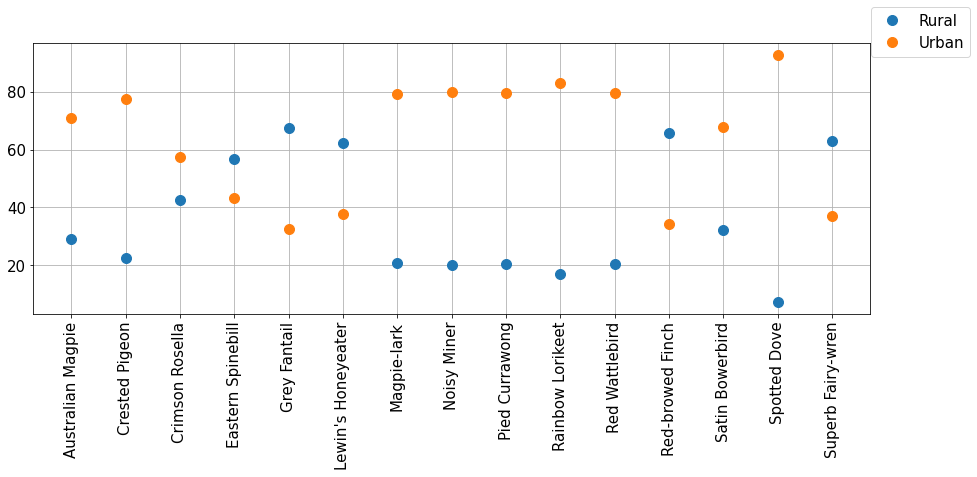

In [9]:
# run this cell to plot probabilities
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(probability.Rural,'o',markersize='10', label='Rural')
ax.plot(probability.Urban,'o',markersize='10', label='Urban')
ax.grid(True)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()

We'll use the `urban_rural`, `bird_type` and `bioregions` features to predict these probabilities.

**Part 4:** Define the feature matrix X (columns `urban_rural`, `bird_type` and `bioregions`) and the target vector y (`bird` column) from the dataframe, and then split X and y into training and testing sets.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# your code here
x=birds[['urban_rural','bird_type','bioregions']]
y=birds['bird']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

**Part 5:** build a pipeline with the following steps: an imputer, a one-hot-encoder, and a logistic regression model.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
set_config(display='diagram')

In [14]:
pipe= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy= 'most_frequent')),
    ('encoder',OneHotEncoder()),
    ('logistic regression',LogisticRegression(max_iter=5000))
])

Fit your pipeline to the training data

In [15]:
# your code here
pipe.fit(x_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder()),
                ('logistic regression', LogisticRegression(max_iter=5000))])

Use the `predict_proba` method to compute the seeing-a-bird probability on the testing data.

In [16]:
# your code here
y_test_proba=pipe.predict_proba(x_test)
y_test_proba[:,1]

array([0.11935941, 0.15008694, 0.1282928 , ..., 0.1672368 , 0.15647962,
       0.14744676])

Run the following two cells.

In [17]:
# this cell creates a dataframe with the computed probabilities
results = x_test.copy()
results['proba'] = (y_test_proba[:,1])*100

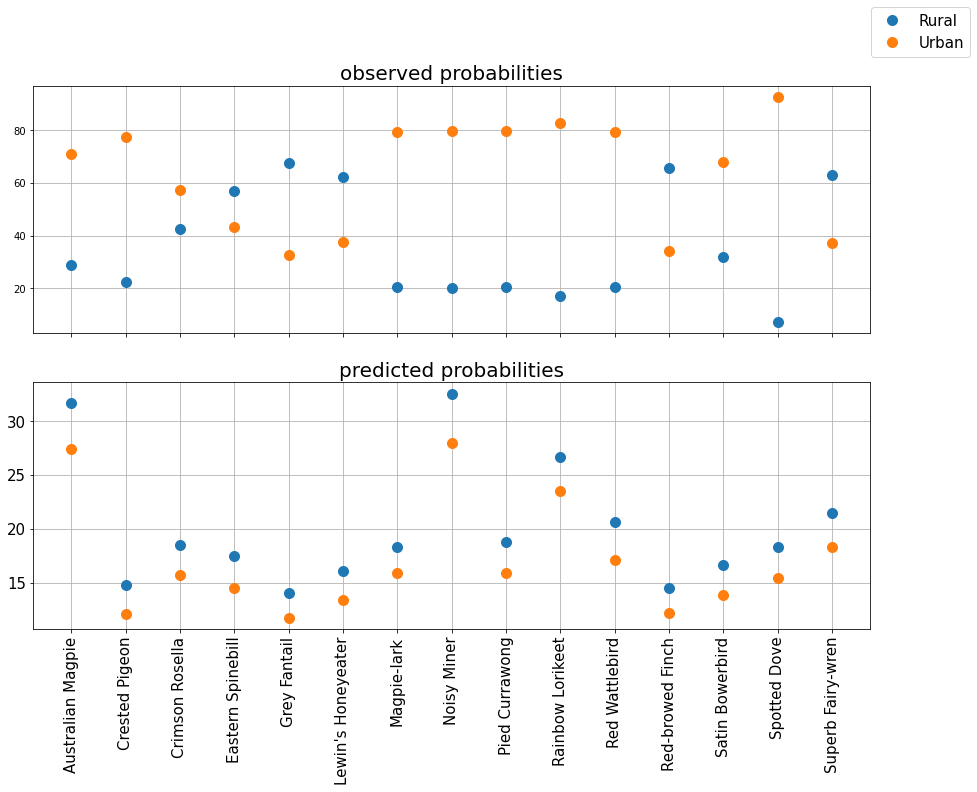

In [18]:
# this cell plots the observed and computed probabilities
probability_test = pd.pivot_table(data=results, values='proba', index='bird_type', columns='urban_rural', aggfunc = 'mean')

fig, ax = plt.subplots(2,1,figsize=(15,10),sharex=True)

ax[0].plot(probability.Rural,'o',markersize='10', label='Rural')
ax[0].plot(probability.Urban,'o',markersize='10', label='Urban')
ax[0].grid(True)
ax[0].set_title('observed probabilities', fontsize=20)

ax[1].plot(probability_test.Rural,'o',markersize='10')
ax[1].plot(probability_test.Urban,'o',markersize='10')
ax[1].grid(True)
ax[1].set_title('predicted probabilities', fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()

The predicted probabilities don't look great. 

**Part 6:** Add polynomial features (of degree 2) to your pipeline, and repeat **Part 5**

In [19]:
# your code here
from sklearn.preprocessing import PolynomialFeatures
pipe= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy= 'most_frequent')),
    ('encoder',OneHotEncoder()),
    ('poly_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('logistic regression',LogisticRegression(max_iter=5000))
])

In [20]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder()),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('logistic regression', LogisticRegression(max_iter=5000))])

In [21]:
y_test_proba=pipe.predict_proba(x_test)
y_test_proba[:,1]

array([0.08218031, 0.05579901, 0.1105979 , ..., 0.04747925, 0.36867643,
       0.05933134])

In [22]:
# this cell creates a dataframe with the computed probabilities
results = x_test.copy()
results['proba'] = (y_test_proba[:,1])*100
results

,urban_rural,bird_type,bioregions,proba
85220,Urban,Crimson Rosella,South East Coastal Plain,8.218031
6795,Urban,Red Wattlebird,South Eastern Queensland,5.579901
126844,Urban,Crested Pigeon,Sydney Basin,11.059790
43929,Urban,Spotted Dove,Sydney Basin,19.178013
43567,Urban,Red-browed Finch,Sydney Basin,5.639191
...,...,...,...,...
87024,Urban,Spotted Dove,South East Coastal Plain,25.374644
71015,Rural,Red Wattlebird,Sydney Basin,11.334553
78269,Rural,Satin Bowerbird,South Eastern Highlands,4.747925
133554,Urban,Crimson Rosella,South Eastern Highlands,36.867643


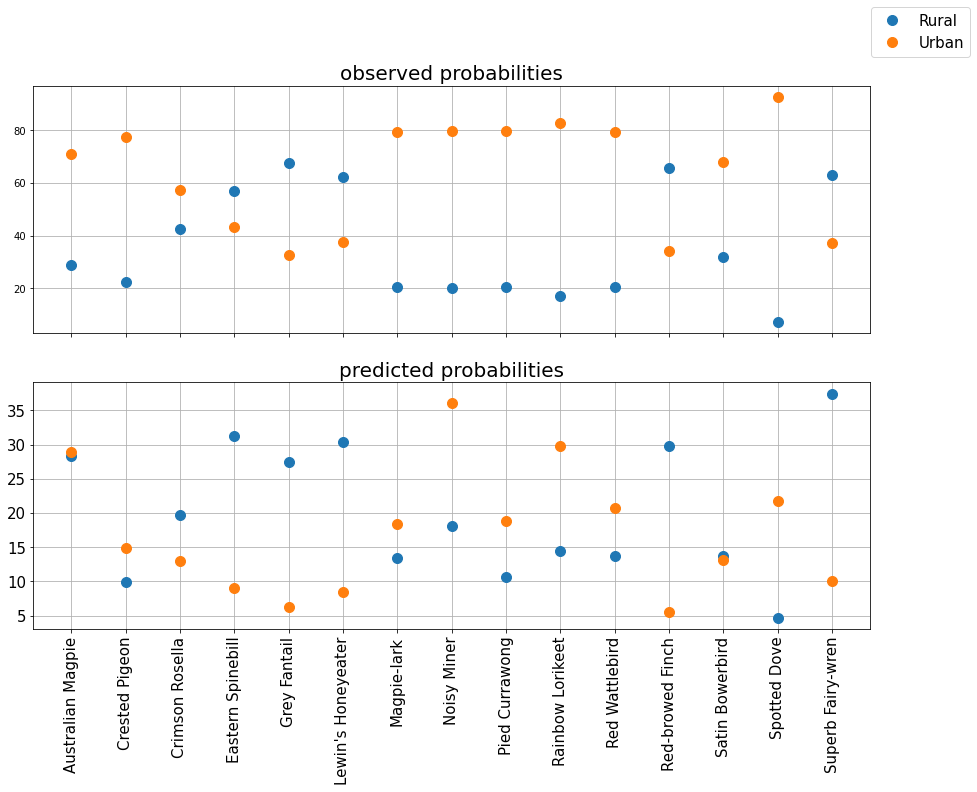

In [23]:
# this cell plots the observed and computed probabilities
probability_test = pd.pivot_table(data=results, values='proba', index='bird_type', columns='urban_rural', aggfunc = 'mean')

fig, ax = plt.subplots(2,1,figsize=(15,10),sharex=True)

ax[0].plot(probability.Rural,'o',markersize='10', label='Rural')
ax[0].plot(probability.Urban,'o',markersize='10', label='Urban')
ax[0].grid(True)
ax[0].set_title('observed probabilities', fontsize=20)

ax[1].plot(probability_test.Rural,'o',markersize='10')
ax[1].plot(probability_test.Urban,'o',markersize='10')
ax[1].grid(True)
ax[1].set_title('predicted probabilities', fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()